In [16]:
import pandas as pd
import statsmodels
import matplotlib.pyplot as plt
import os
from interpret import show
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import numpy as np
from interpret import set_visualize_provider
from interpret.provider import InlineProvider
from sklearn.linear_model import LogisticRegression
from interpret.glassbox import ClassificationTree
from interpret.provider import InlineProvider
from sklearn import tree
set_visualize_provider(InlineProvider())


train_data = pd.read_csv(os.path.join(os.getcwd(),
                                      "..\\datasets\\titanic.csv"))
train_data = train_data.dropna()
train_data.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {
                   'S': 0, 'C': 1, 'Q': 2}}, inplace=True)
train_data = train_data.drop(
    columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
X = train_data.drop(columns=['Survived'], axis=1)
Y = train_data['Survived']
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=2)
model = ClassificationTree()
clf = tree.DecisionTreeClassifier()
model.fit(X_train, Y_train)
clf.fit(X_train, Y_train)

auc = roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1])
auc2 = roc_auc_score(Y_test, clf.predict_proba(X_test)[:, 1])
print(clf.feature_importances_,X.columns)
print("AUC: {:.3f}".format(auc))
print("AUC: {:.3f}".format(auc2))

show(model.explain_global())


[0.0209184  0.26474956 0.35979633 0.02740764 0.         0.31666886
 0.0104592 ] Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')
AUC: 0.808
AUC: 0.647


In [22]:
print(X_test[:50])
show(model.explain_local(X_test[:150], Y_test[:150]), 0)


     Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
23        1    0  28.0      0      0   35.5000         0
745       1    0  70.0      1      1   71.0000         0
536       1    0  45.0      0      0   26.5500         0
679       1    0  36.0      0      1  512.3292         1
75        3    0  25.0      0      0    7.6500         0
209       1    0  40.0      0      0   31.0000         1
781       1    1  17.0      1      0   57.0000         0
10        3    1   4.0      1      1   16.7000         0
689       1    1  15.0      0      1  211.3375         0
262       1    0  52.0      1      1   79.6500         0
269       1    1  35.0      0      0  135.6333         0
741       1    0  36.0      1      0   78.8500         0
390       1    0  36.0      1      2  120.0000         0
177       1    1  50.0      0      0   28.7125         1
765       1    1  51.0      1      0   77.9583         0
148       2    0  36.5      0      2   26.0000         0
759       1    1  33.0      0  

AUC: 0.944
AUC2: 0.944


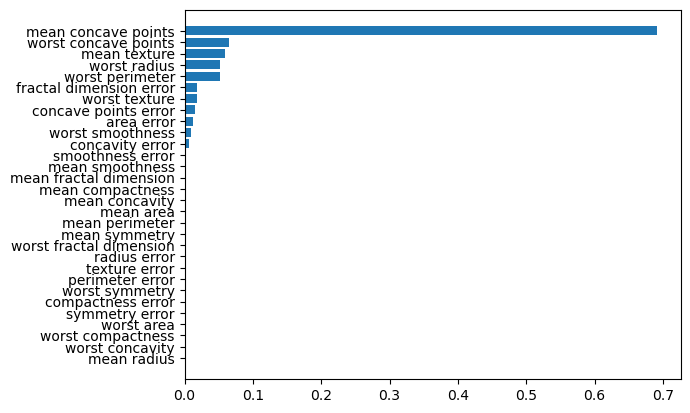

In [70]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

from interpret.glassbox import ClassificationTree
from interpret import show
from sklearn.tree import DecisionTreeClassifier

seed = 42
np.random.seed(seed)
X, y = load_breast_cancer(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed)

dt = ClassificationTree(random_state=seed,max_depth= 8)
sk = DecisionTreeClassifier(random_state=seed,max_depth= 8)
dt.fit(X_train, y_train)
sk.fit(X_train, y_train)


auc = roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1])
auc2 = roc_auc_score(y_test, sk.predict_proba(X_test)[:, 1])
print("AUC: {:.3f}".format(auc))
print("AUC2: {:.3f}".format(auc2))
forest_importances = pd.Series(sk.feature_importances_, index=X.columns)
forest_importances.sort_values(inplace=True)
show(dt.explain_global())
plt.barh(forest_importances.index, forest_importances)
plt.show()


In [47]:
from IPython.display import display, HTML
pd.set_option('display.max_columns', None)

df =  pd.DataFrame(X_test[:5])
display(df)
show(dt.explain_local(X_test[:5], y_test[:5]), 0)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
204,12.47,18.60,81.09,481.9,0.09965,0.1058,0.08005,0.03821,0.1925,0.06373,0.3961,1.0440,2.497,30.29,0.006953,0.01911,0.02701,0.01037,0.01782,0.003586,14.97,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.10150,0.3014,0.08750
70,18.94,21.31,123.60,1130.0,0.09009,0.1029,0.10800,0.07951,0.1582,0.05461,0.7888,0.7975,5.486,96.05,0.004444,0.01652,0.02269,0.01370,0.01386,0.001698,24.86,26.58,165.90,1866.0,0.1193,0.2336,0.2687,0.17890,0.2551,0.06589
131,15.46,19.48,101.70,748.9,0.10920,0.1223,0.14660,0.08087,0.1931,0.05796,0.4743,0.7859,3.094,48.31,0.006240,0.01484,0.02813,0.01093,0.01397,0.002461,19.26,26.00,124.90,1156.0,0.1546,0.2394,0.3791,0.15140,0.2837,0.08019
431,12.40,17.68,81.47,467.8,0.10540,0.1316,0.07741,0.02799,0.1811,0.07102,0.1767,1.4600,2.204,15.43,0.010000,0.03295,0.04861,0.01167,0.02187,0.006005,12.88,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359
540,11.54,14.44,74.65,402.9,0.09984,0.1120,0.06737,0.02594,0.1818,0.06782,0.2784,1.7680,1.628,20.86,0.012150,0.04112,0.05553,0.01494,0.01840,0.005512,12.26,19.68,78.78,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134


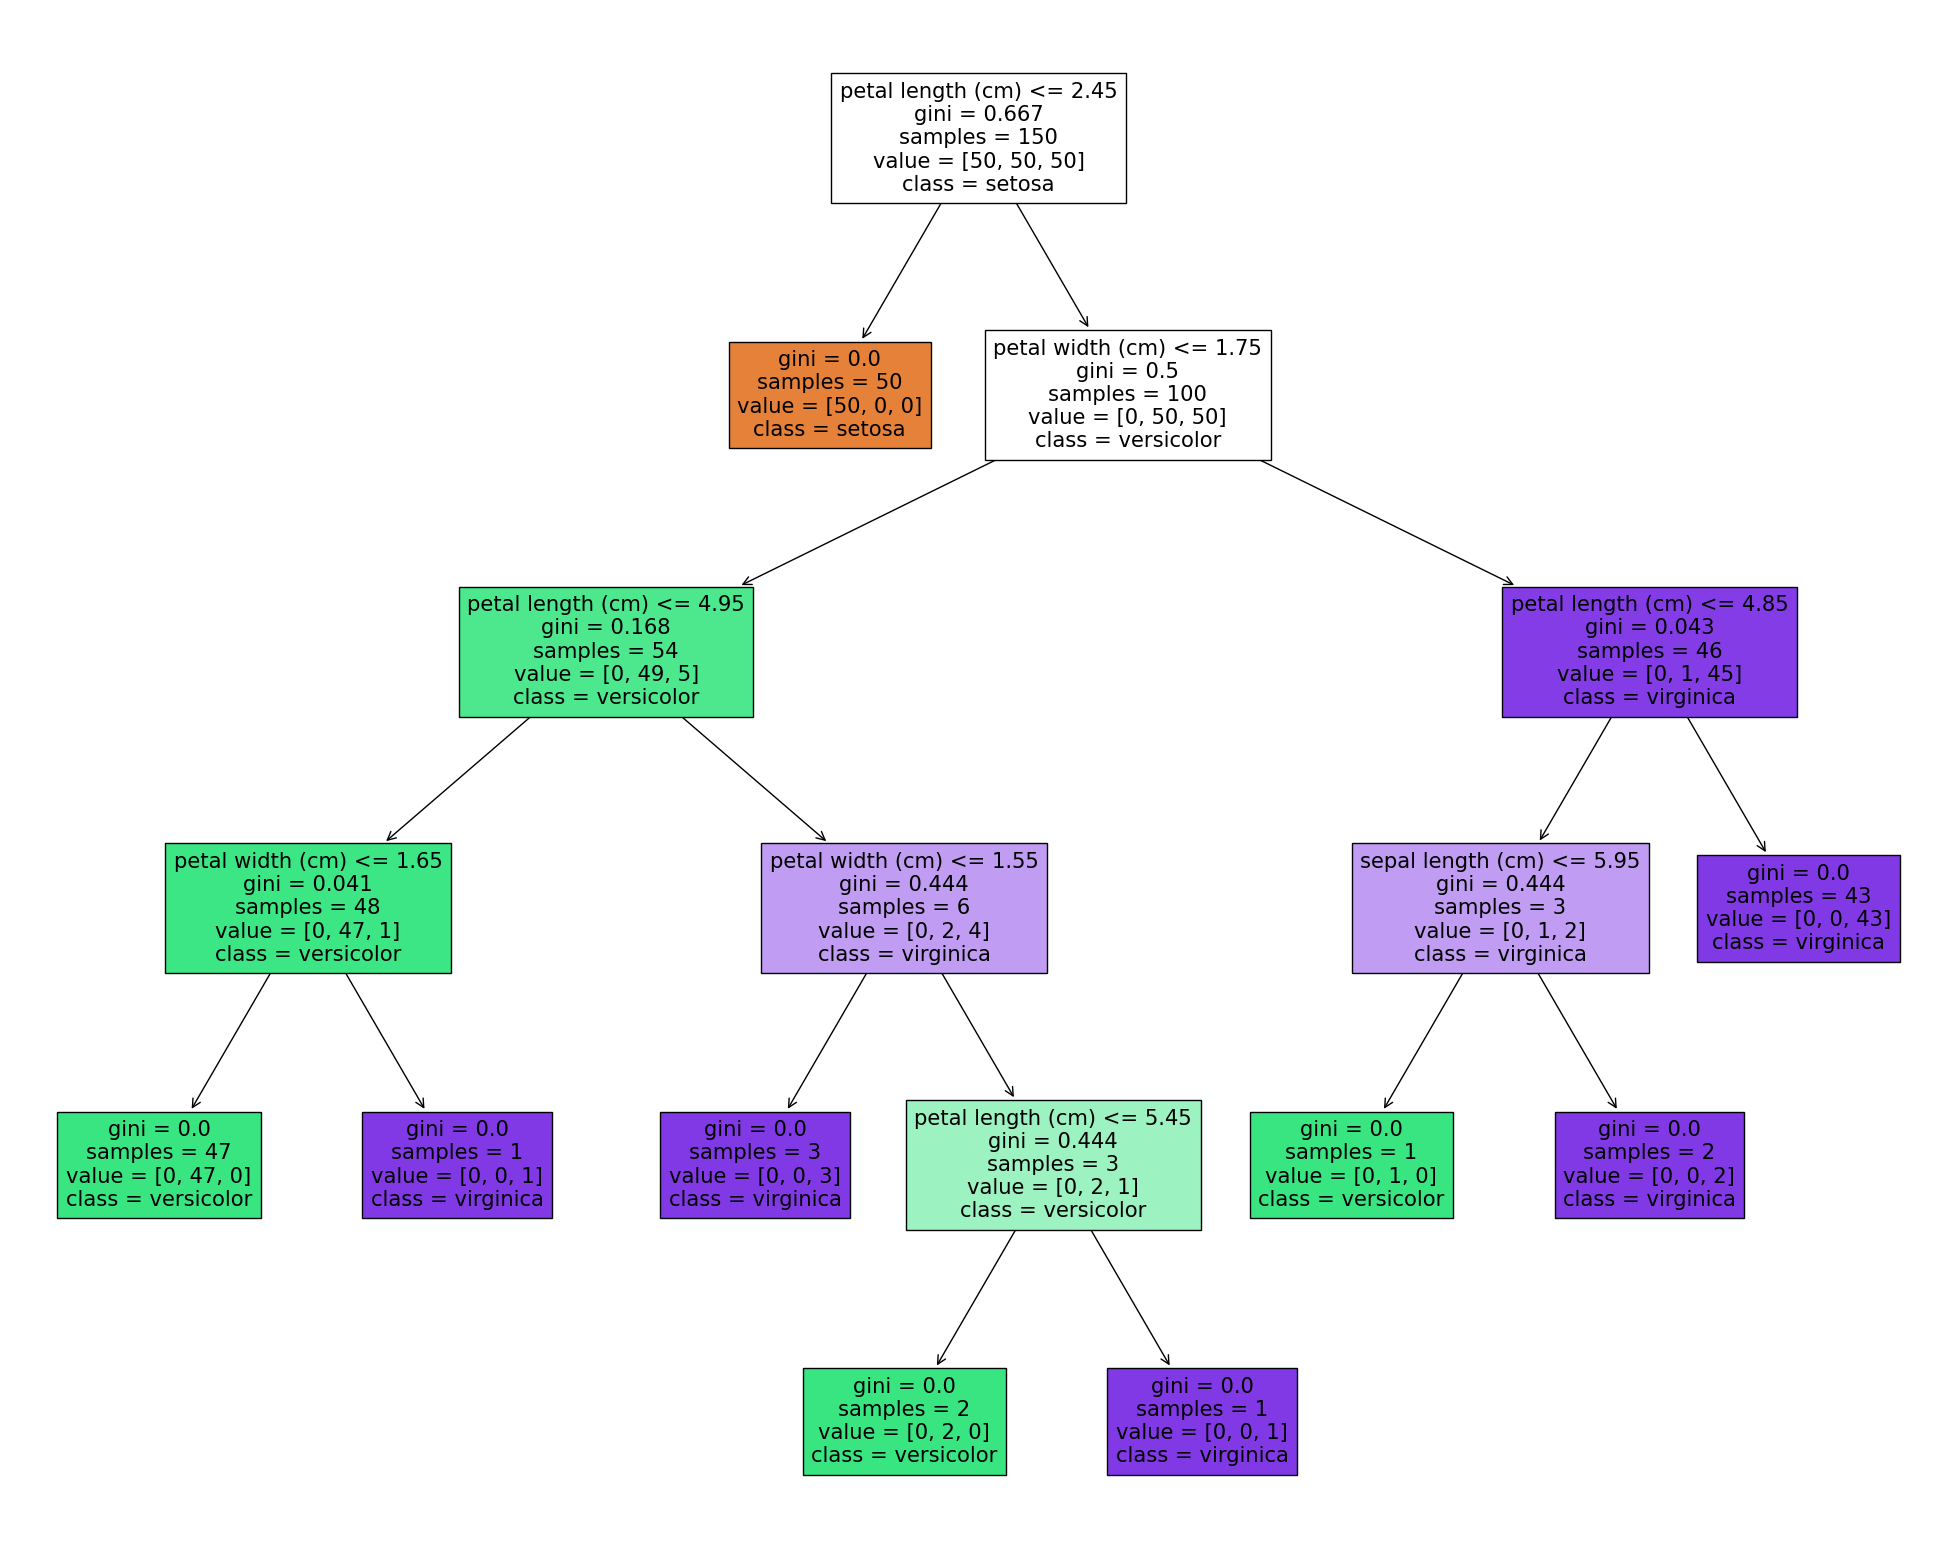

In [54]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()

dt = DecisionTreeClassifier(random_state=seed)
dt.fit(iris.data, iris.target)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

In [55]:
df =  pd.DataFrame(iris.data[:5])
display(df)
show(dt.explain_local(iris.data[:5], iris.target[:5]), 0)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


AttributeError: 'DecisionTreeClassifier' object has no attribute 'explain_local'